**сеть Кохонена, кластеризация**

Евгений Борисов esborisov@sevsu.ru

Кластеризатор на основе нейронной сети Кохонена.   
http://mechanoid.su/neural-net-kohonen-clusterization.html

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

n_samples = 500
n_clusters = 5 # количество кластеров

X,_ = make_blobs( 
        n_samples=n_samples,
        centers=n_clusters,  
        cluster_std=rng.uniform(size=n_clusters)+.7
    )
X.shape

(500, 2)

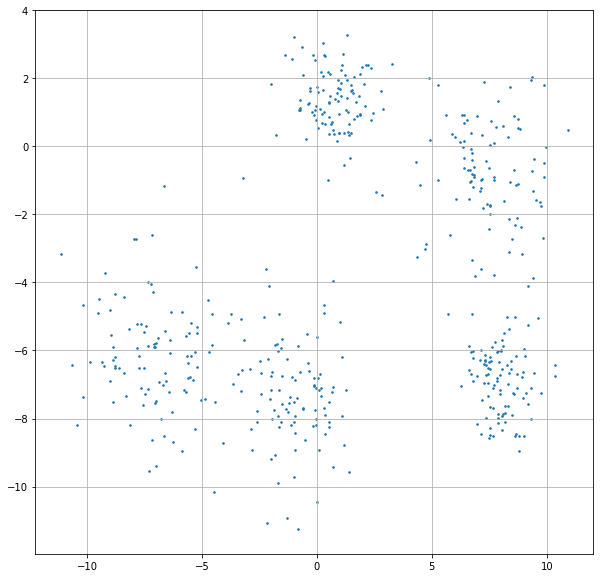

In [3]:
plt.figure(figsize=(10,10))
plt.scatter( x=X[:,0], y=X[:,1], s=10, marker='.' )
plt.grid()

---

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

In [5]:
def state(x,w): # состояние нейронов
    return euclidean_distances(x,w)
    # return x.dot(w)

def score(x,w): 
    return state(x,w)

def predict(x,w): 
    return np.argmax( score(x,w), axis=1)

In [31]:
# инициализация параметров сети
def weight_init(input_size,output_size):
    return rng.uniform(size=(output_size**2,input_size)) 

weight = weight_init(input_size=X.shape[1],output_size=3)
# predict(X,weight)

$$
w_{ij} := w_{ij} + η (x_i − w_{ij})
$$

In [32]:
X_train = X

Каждый нейрон первого (распределительного) слоя соединен со всеми нейронами второго (выходного) слоя, которые расположены в виде двумерной решетки.

производится корректировка весов для нейрона-победителя   
и весов нейронов из его окрестности,   
которая задаётся соответствующей функцией окрестности (функция Гаусса)   

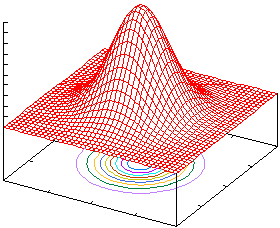

In [28]:
n_samples  = X_train.shape[0]
n_clusters = weight.shape[0]

lr=.1

n_epoch = 10

for i in range(n_epoch):
    # для каждого примера определить нейрон-победитель (вектор весов)
    winner = predict(X_train,weight)#[np.newaxis]
    # для каждого победителя выделить его примеры
    xw = [ X_train[winner==c] for c in range(n_clusters) ]
    # для каждого победителя расчитать (суммарное по примерам) изменение весов
    dw = np.vstack([ (xw[c] + weight[c,:]).sum(axis=0) for c in range(n_clusters) ])
    dw = dw/dw.max()
    # w_prev = w.copy()
    weight -= lr*dw
    
#     print( np.square(w-w_prev).sum()/np.prod(w.shape) )

---

In [29]:
p = predict(X_train,weight)

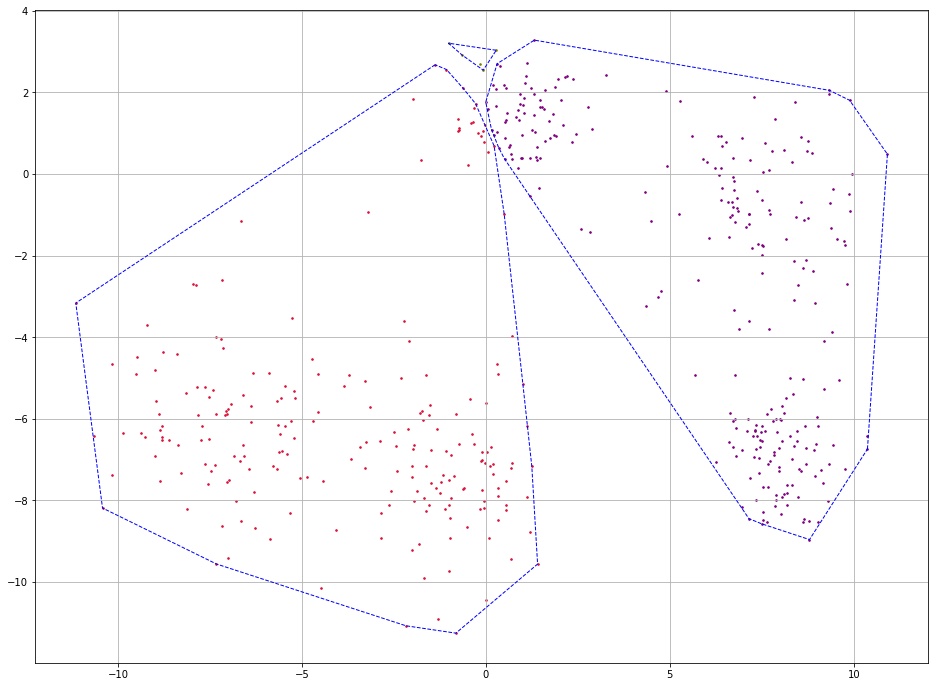

In [30]:
from scipy.spatial import ConvexHull

def color(i):
    c = ['darkorange','olive','purple','magenta','crimson','seagreen']
    return c[i] if i<len(c) else 'blue'

def hull(x):
    if len(x)<3: return
    hull = ConvexHull(x) # рисуем выпуклую оболочку вокруг кластера
    v = np.append( hull.vertices, hull.vertices[0] ) # замыкаем оболочку
    plt.plot(x[v,0],x[v,1],'--',lw=1,c='b')

def plot(X,y,figsize=(16,12)):
    plt.figure(figsize=figsize)
    #colors = rng.uniform(size=(len(set(y)),3),low=.3,high=1.)
    for j in set(y): 
        plt.scatter( x=X[y==j,0], y=X[y==j,1], s=10, marker='.',c=color(j) )
        hull(X[y==j])
    plt.grid()

    
plot(X,p)

---

In [ ]:
# оценка результата
from sklearn.metrics import silhouette_score

# отношение внутрикластерного и межкластерного расстояний
silhouette_score(X,p)

In [ ]:
# from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
# def get_labels(X,mu): # сформировать кластеры
#     d = euclidean_distances(X,mu) # расстояния от центроидов до всех точек 
#     return np.argmin(d,axis=1) # номера кластеров (ближайших центроидов) всех для точек

# def move_centroid(X,mu,y): # пересчитываем центроиды
#     return np.vstack([ 
#         X[(y==j)].mean(axis=0) # пересчитываем центроид для кластера j
#         if len(X[(y==j)])>0 # если кластер пустой
#         else mu[j] # то оставляем старый центроид
#         for j in set(y) # для всех меток кластеров
#     ])

# def kmeans(X,mu,min_delta_mu=1e-10,n_epoch=100):
#     for _ in range(n_epoch):
#         y = get_labels(X,mu) # сформировать кластеры
#         mu_prev = mu # сохранить старые центроиды
#         mu = move_centroid(X,mu,y) # пересчитать центроиды
#         # проверяем среднее смещение центроидов
#         if (np.diag(euclidean_distances(mu,mu_prev)).sum()/len(mu))<min_delta_mu: 
#             break
#     return mu, get_labels(X,mu)

In [ ]:
# mu,y = kmeans(X,mu)